# Self Organizing Map

In [1]:
#load the data
import pandas as pd
import os
import numpy as np
import math
path=r'C:\Users\faisa\OneDrive\Documents\Semester 2\Data Mining\Data'
data=pd.read_csv(path + '\iris.csv')

In [2]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
#set input and target data
target_column = ['variety'] 
predictors = list(set(list(data.columns))-set(target_column))

X = data[predictors].values
y = data[target_column].values

In [5]:
#initializing parameter
output_width=9
output_height=9
radius=math.sqrt((output_width-1)**2+(output_height-1)**2)
r_rate=0.98
lr=0.1

#initializing weight
w_new=np.average(X)*(np.random.rand(output_height,output_width, len(predictors)))
w_old= np.zeros((output_height,output_width, len(predictors)))

In [6]:
timestep=0
e=0 #error
iterations=500
iteration=0
state=0
convergence=[]
while iteration < iterations:
    rand_index=np.random.randint(len(X), size=len(X))
    conv=[]
    for rands in rand_index:
        error= np.linalg.norm(w_new - w_old) #change of weight value
        if error<=e:
            state=1
            break
        else:
            distance= np.linalg.norm((X[rands]-w_new)**2, axis=2)
            best_individu=np.unravel_index(np.argmin(distance, axis=None), distance.shape)
            w_old=np.copy(w_new)
            output_vector=np.zeros((output_height,output_width))
            output_vector[best_individu[0]][best_individu[1]]=1
            for height in range(output_height):
                for width in range (output_width):
                    neighborhood = math.exp(-math.sqrt(np.linalg.norm([(height - best_individu[0])**2, (width - best_individu[1])**2]))/radius)
                    w_new[height][width] = w_new[height][width] + lr*(X[rands]-w_new[height][width])*neighborhood
            lr = lr*(1-(iteration/iterations))
            radius=radius*r_rate
            timestep+=1
            conv.append(np.amin(distance))
    convergence.append(sum(conv))
    if state==1:
        break
    iteration+=1

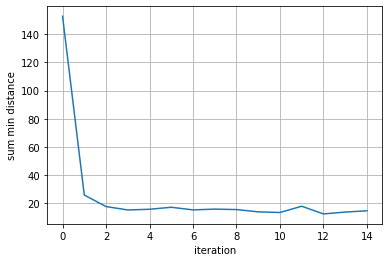

Number of timesteps: 2233
Final error: 0.0034989172110918496


In [7]:
import matplotlib.pyplot as plt
plt.plot(convergence)
plt.ylabel('sum min distance')
plt.xlabel('iteration')
plt.grid(True)
#plt.yscale('log')
plt.show()
print('Number of timesteps: ' + str(timestep))
print('Final error: ' + str(np.amin(distance)))

In [8]:
best_individu = np.zeros([2],dtype=np.int32)
result = np.zeros([output_height,output_width],dtype=np.float32)
for dat in range(len(data)):
    distance= np.linalg.norm(w_new - X[dat], axis=2)
    best_individu=np.unravel_index(np.argmin(distance, axis=None), distance.shape)
    result[best_individu[0]][best_individu[1]]+=1
print (result)
#np.savetxt("result.csv", result, delimiter=",")

[[ 0.  1.  0.  1.  1.  4.  0. 15. 12.]
 [ 0.  0.  1.  0.  0.  1.  2.  3.  7.]
 [ 3.  0.  0.  0.  0.  0.  1.  5.  2.]
 [ 1.  0.  0.  0.  1.  2.  3.  2.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  4.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  3.  1.  3.]
 [22.  0.  0.  0.  0.  0.  0.  6.  2.]
 [22.  6.  0.  0.  0.  0.  1.  0.  1.]]


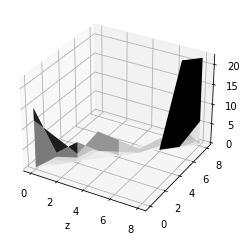

In [9]:
#contour plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X=np.asarray(np.arange(output_width))
X=np.repeat(X, output_height)
X=np.reshape(X,(output_width,output_height))

Y=np.asarray(np.arange(output_height))
Y=np.repeat(Y, output_width)
Y=np.reshape(Y,(output_height,output_width))

Z=result

X = np.reshape(X, Z.shape)
Y = np.reshape(Y, Z.shape)

output = plt.subplot(111, projection = '3d')   # 3d projection
output.plot_surface(X, Y, Z, rstride = 2, cstride = 1, cmap = plt.cm.binary)
output.set_xlabel('x')                         # axis label
output.set_xlabel('y')
output.set_xlabel('z')

plt.show()